In [ ]:
#this is for google colab, if not running it with google colab please comment this
from google.colab import files
 
 
uploaded = files.upload()

Saving Tetuan City power consumption.csv to Tetuan City power consumption (3).csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.svm import SVR
from sklearn.datasets import make_classification
from matplotlib import pyplot
#import requests, io
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv('Tetuan City power consumption.csv')

In [ ]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
df["DateTime"]=pd.to_datetime(df["DateTime"])

In [ ]:
df["Month"]=df["DateTime"].dt.month
df["Week"]=df["DateTime"].dt.weekday
df["hour"]=df["DateTime"].dt.hour

In [ ]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Month,Week,hour
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,6,0
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,6,0
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,6,0
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,6,0
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,6,0


In [ ]:
df.hour.unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
df.Month.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
df.Week.unique()

array([6, 0, 1, 2, 3, 4, 5])

#power consumption vs hour

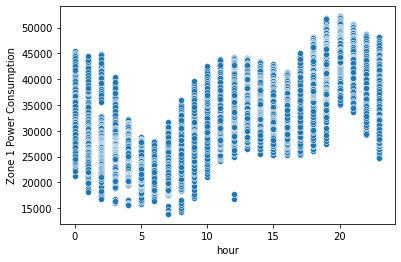

In [ ]:
sns.scatterplot(data=df, x="hour",y="Zone 1 Power Consumption")

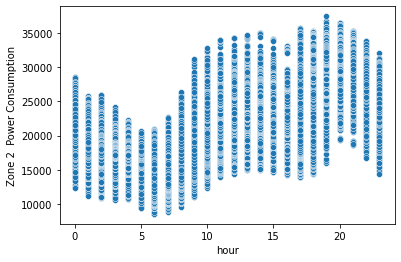

In [ ]:
sns.scatterplot(data=df, x="hour",y="Zone 2  Power Consumption")

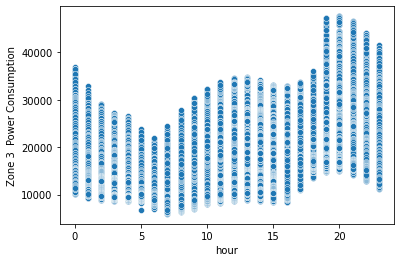

In [ ]:
sns.scatterplot(data=df, x="hour",y="Zone 3  Power Consumption")

#power consumption vs Week

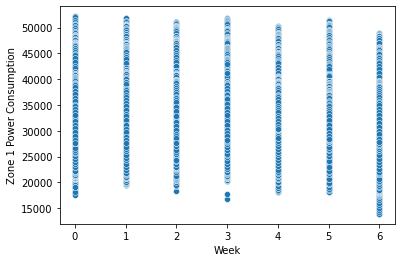

In [ ]:
sns.scatterplot(data=df, x="Week",y="Zone 1 Power Consumption")

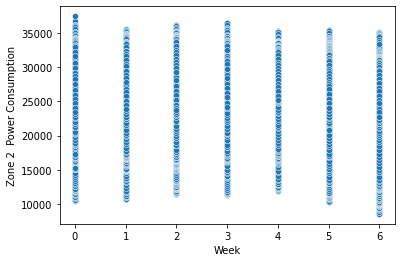

In [ ]:
sns.scatterplot(data=df, x="Week",y="Zone 2  Power Consumption")

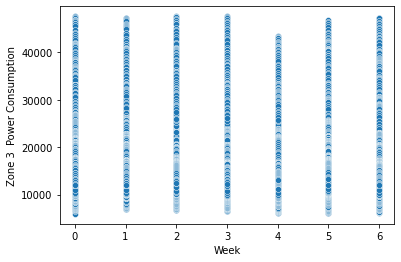

In [ ]:
sns.scatterplot(data=df, x="Week",y="Zone 3  Power Consumption")

#power consumption vs months

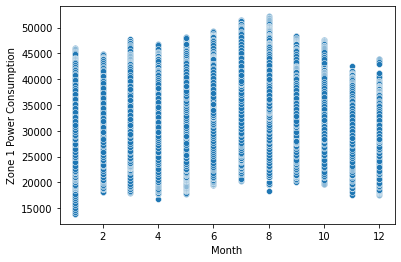

In [ ]:
sns.scatterplot(data=df, x="Month",y="Zone 1 Power Consumption")

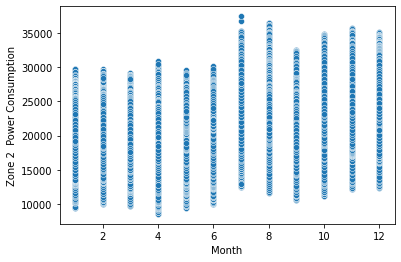

In [ ]:
sns.scatterplot(data=df, x="Month",y="Zone 2  Power Consumption")

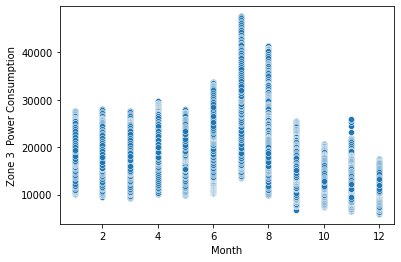

In [ ]:
sns.scatterplot(data=df, x="Month",y="Zone 3  Power Consumption")

In [ ]:
x = df[['hour','Week','Month','Temperature','Humidity','Wind Speed','general diffuse flows', 'diffuse flows']]
y = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

#LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

In [ ]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
print("Train score:")
print(lin_reg.score(X_train, y_train))

print("Test score:")
print(lin_reg.score(X_test, y_test))

Train score:
0.6127012541903453
Test score:
0.6149510434725897


In [ ]:
y_pred = lin_reg.predict(X_test)
y_pred
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 3948.051


#SVR

In [ ]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [ ]:
svr = SVR().fit(X_train, y_train)
print(svr)

yfit = svr.predict(X_test)
clf = SVR()
clf = clf.fit(X_train, y_train)
s=clf.score(X_test, y_test)
s

SVR()


0.448033584003656

In [ ]:
y_pred = svr.predict(X_test)
y_pred
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.371


#RandomForest

In [ ]:
x = df[['hour','Week','Month','Temperature','Humidity','Wind Speed','general diffuse flows', 'diffuse flows']]
y = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

In [ ]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [ ]:
model = RandomForestRegressor(n_estimators = 20, random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

[[35224.760658  22334.8606815 20904.77733  ]
 [22911.846573  13682.2414985 11866.0769   ]
 [40718.5971145 28509.37698   26547.7617555]
 ...
 [22105.2692575 13735.623103  14625.7397815]
 [36845.2910445 25787.5824395 30149.457222 ]
 [21688.3076915 17031.198347  10504.1927705]]


In [ ]:
model.score(x_test, y_test)

0.9808149990761602

In [ ]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 873.575


In [ ]:
x = df[['hour','Week','Month']]#,'Temperature','Humidity','Wind Speed','general diffuse flows', 'diffuse flows']]
y = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 20, random_state = 0)
# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 
# Predicting the target values of the test set
y_pred = model.predict(x_test)
print(y_pred)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)
model.score(x_test, y_test)

[[34320.58175289 21526.61771932 20612.5172429 ]
 [22991.0194704  13797.15158403 11997.36639338]
 [40726.16811825 28366.7322726  25524.61775677]
 ...
 [21828.02925331 14187.70314131 14606.57242115]
 [38471.30193134 26391.37955958 29590.56629706]
 [21839.7792174  16838.12722399 10865.88070361]]

RMSE:
 1686.73


0.9274985382750773

In [ ]:
x = df[['Temperature','Humidity','Wind Speed','general diffuse flows', 'diffuse flows']]
y = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 20, random_state = 0)
# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 
# Predicting the target values of the test set
y_pred = model.predict(x_test)
print(y_pred)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)
model.score(x_test, y_test)

[[26349.262467   16720.26437    14757.63767195]
 [24691.5040775  13805.425626   14811.99997925]
 [40532.883463   28380.31679    26578.1567395 ]
 ...
 [22845.837374   14179.3313065  14298.448483  ]
 [37243.5465675  26145.4489195  29804.9396    ]
 [24564.615385   19390.1652885  11655.6144565 ]]

RMSE:
 3998.406


0.5991714737842176

In [ ]:
x = df[['general diffuse flows', 'diffuse flows']]
y = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 20, random_state = 0)
# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 
# Predicting the target values of the test set
y_pred = model.predict(x_test)
print(y_pred)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)
model.score(x_test, y_test)

[[27667.67523769 18971.85894502 14226.04736261]
 [47961.2124515  32379.526947   38092.6795805 ]
 [35547.3044155  21013.14844    18758.496983  ]
 ...
 [21631.0847832  13991.96452016 10722.31536929]
 [29524.161728   18131.0147585  16368.4728865 ]
 [32231.26082939 20655.33931921 18326.66210954]]

RMSE:
 6246.08


0.03385153788347909

In [ ]:
x = df[['Temperature','Humidity','Wind Speed']]
y = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 20, random_state = 0)
# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 
# Predicting the target values of the test set
y_pred = model.predict(x_test)
print(y_pred)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)
model.score(x_test, y_test)

[[27770.2498795  19135.105321   12451.4506377 ]
 [33782.5635525  18586.968196   20893.5377875 ]
 [40773.576027   28561.457233   26657.3040745 ]
 ...
 [21822.683545   13490.6990885  14012.5301195 ]
 [37160.950058   26015.607181   29674.532916  ]
 [28640.521934   20504.452872   14460.79262225]]

RMSE:
 4773.896


0.4298803105118913